In [5]:
import numpy as np
import loompy
import matplotlib.pyplot as plt
import logging

from cytograph.visualization.scatter import *

(59480, 18830)


10:57:36 INFO     turning off visibility on remaining axes


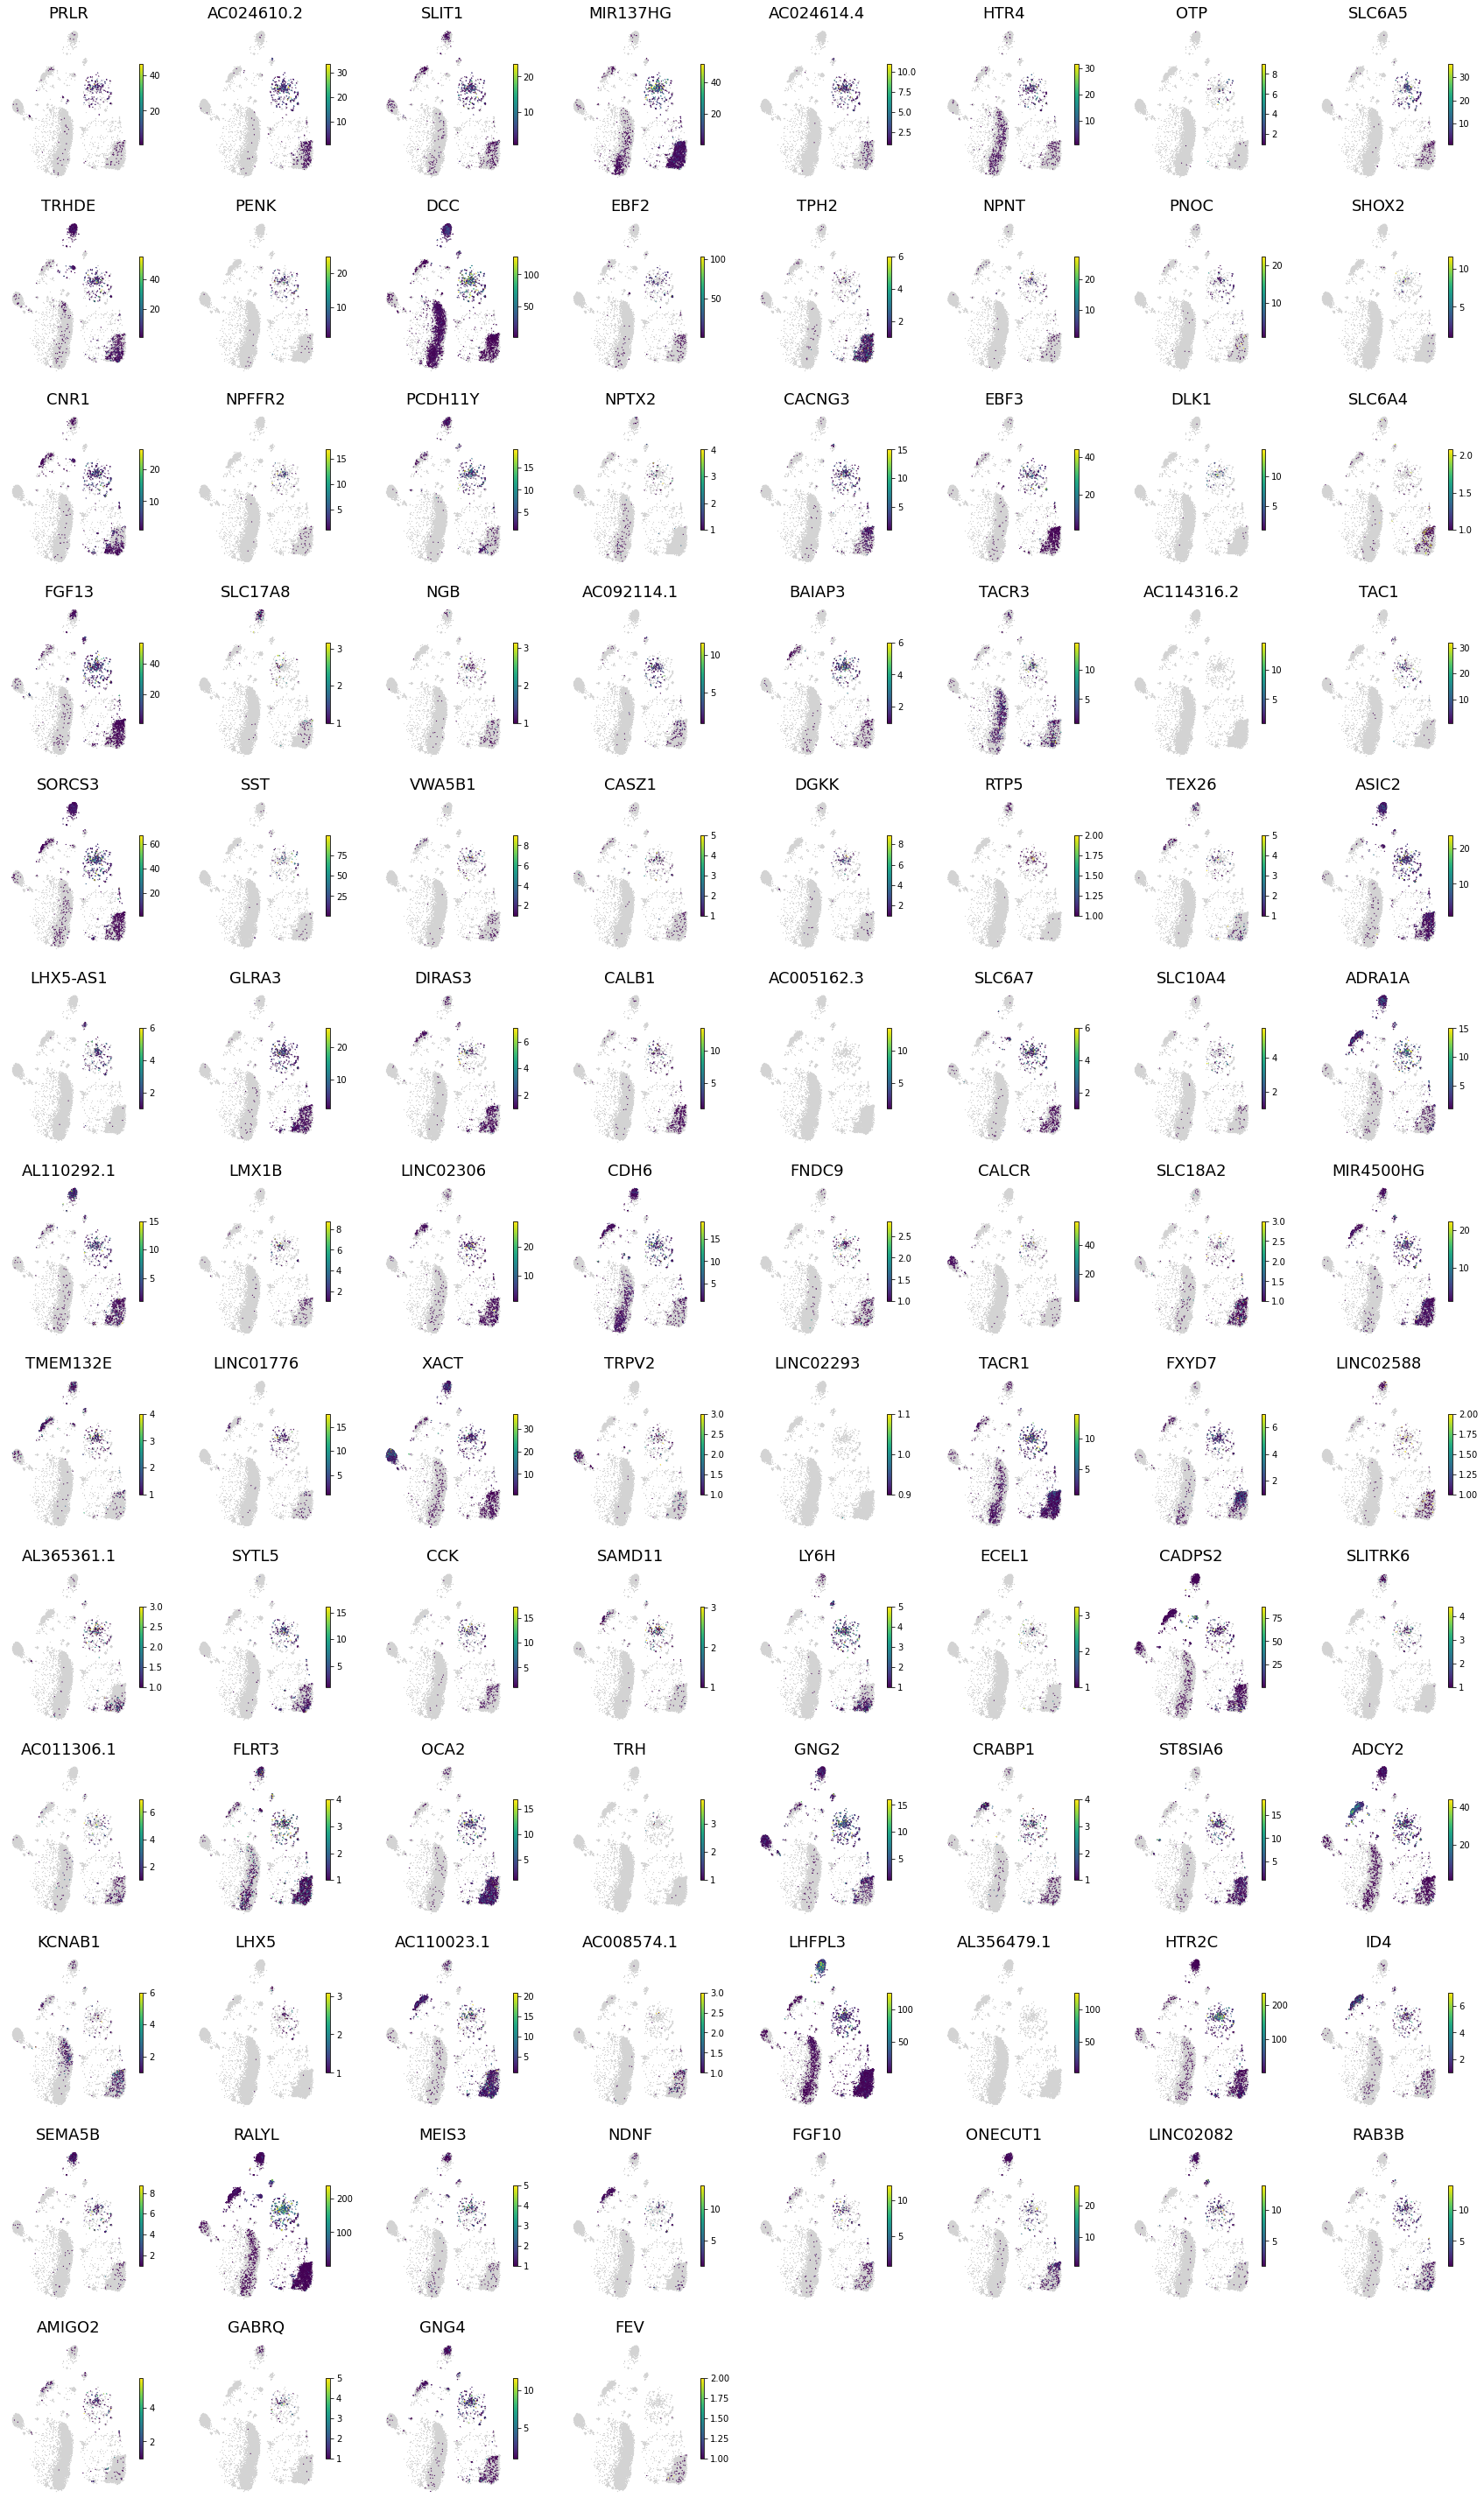

In [23]:
genes = ['PRLR', 'AC024610.2', 'SLIT1', 'MIR137HG', 'AC024614.4', 'HTR4',
       'OTP', 'SLC6A5', 'TRHDE', 'PENK', 'DCC', 'EBF2', 'TPH2', 'NPNT',
       'PNOC', 'SHOX2', 'CNR1', 'NPFFR2', 'PCDH11Y', 'NPTX2', 'CACNG3',
       'EBF3', 'DLK1', 'SLC6A4', 'FGF13', 'SLC17A8', 'NGB', 'AC092114.1',
       'BAIAP3', 'TACR3', 'AC114316.2', 'TAC1', 'SORCS3', 'SST', 'VWA5B1',
       'CASZ1', 'DGKK', 'RTP5', 'TEX26', 'ASIC2', 'LHX5-AS1', 'GLRA3',
       'DIRAS3', 'CALB1', 'AC005162.3', 'SLC6A7', 'SLC10A4', 'ADRA1A',
       'AL110292.1', 'LMX1B', 'LINC02306', 'CDH6', 'FNDC9', 'CALCR',
       'SLC18A2', 'MIR4500HG', 'TMEM132E', 'LINC01776', 'XACT', 'TRPV2',
       'LINC02293', 'TACR1', 'FXYD7', 'LINC02588', 'AL365361.1', 'SYTL5',
       'CCK', 'SAMD11', 'LY6H', 'ECEL1', 'CADPS2', 'SLITRK6',
       'AC011306.1', 'FLRT3', 'OCA2', 'TRH', 'GNG2', 'CRABP1', 'ST8SIA6',
       'ADCY2', 'KCNAB1', 'LHX5', 'AC110023.1', 'AC008574.1', 'LHFPL3',
       'AL356479.1', 'HTR2C', 'ID4', 'SEMA5B', 'RALYL', 'MEIS3', 'NDNF',
       'FGF10', 'ONECUT1', 'LINC02082', 'RAB3B', 'AMIGO2', 'GABRQ',
       'GNG4', 'FEV']

nrows = int(np.ceil(len(genes)/8))
fig, ax = plt.subplots(nrows,8, figsize=(30,(nrows*4)))
ax = ax.flatten()

f_RNA = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom'
f_agg = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.agg.loom'
emb = 'TSNE'
with loompy.connect(f_RNA, 'r') as ds:
    print(ds.shape)
    for i, gene in enumerate(genes):
        ## Inferred
        v = ds.layer[''][ds.ra.Gene == gene,:].flatten()
        x = np.where(v > 0)[0]
        ax[i].scatter(ds.ca[emb][:,0], ds.ca[emb][:,1], c='lightgray', marker='.', lw=0, s=6)
        ax[i].set_title(gene, fontsize=18)
        if len(x) > 0:
            im = ax[i].scatter(ds.ca[emb][x,0], ds.ca[emb][x,1], c=v[x], cmap='viridis', vmax = np.quantile(v[x], .99), marker='.', lw=0, s=6)
        fig.colorbar(im, ax=ax[i], orientation='vertical', shrink=.5)
        ax[i].axis('off')
        
    logging.info(f'turning off visibility on remaining axes')
    while i < ax.shape[0]:
        ax[i].axis('off')
        i += 1
        

['', 'enrichment', 'trinaries']
(33538, 39)
['LHFPL3' 'LINC02588' 'AL110292.1' 'SLIT1' 'HTR2C' 'PRLR' 'SLC6A5'
 'AC024610.2' 'AC024614.4' 'PENK' 'GLRA3' 'FGF13' 'EBF3' 'ASIC2' 'CNR1'
 'CADPS2' 'XACT' 'ID4' 'ST8SIA6' 'LINC02293' 'CDH6' 'TACR1' 'AC092114.1'
 'SEMA5B' 'TRHDE' 'RALYL' 'AC110023.1' 'SORCS3' 'KCNAB1' 'OCA2' 'DCC'
 'CRABP1' 'SAMD11' 'BAIAP3' 'TMEM132E' 'SLC6A7' 'ADRA1A' 'AMIGO2'
 'AC005162.3' 'RAB3B' 'LY6H' 'PCDH11Y' 'AL365361.1' 'CACNG3' 'SYTL5'
 'HTR4' 'MIR137HG' 'FXYD7' 'GNG4' 'ADCY2' 'GNG2' 'FLRT3' 'MEIS3'
 'LHX5-AS1' 'LINC02082' 'MIR4500HG']
['LHFPL3' 'LINC02588' 'AL110292.1' 'SLIT1' 'HTR2C' 'PRLR' 'SLC6A5'
 'AC024610.2' 'SST' 'AC024614.4' 'PENK' 'GLRA3' 'EBF2' 'FGF13' 'EBF3'
 'ASIC2' 'CNR1' 'NDNF' 'CADPS2' 'AC008574.1' 'XACT' 'ID4' 'ST8SIA6'
 'LINC02293' 'SLC17A8' 'CDH6' 'TACR1' 'AC092114.1' 'AC011306.1' 'ONECUT1'
 'SEMA5B' 'TRHDE' 'SLITRK6' 'RALYL' 'AC110023.1' 'SORCS3' 'KCNAB1' 'TAC1'
 'SLC10A4' 'OCA2' 'OTP' 'DCC' 'CRABP1' 'CALCR' 'SAMD11' 'TRH' 'TACR3'
 'TEX26' 'FNDC

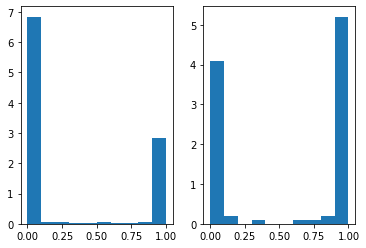

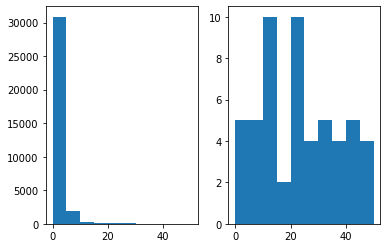

In [6]:
with loompy.connect(f_agg, 'r') as dsagg:
    print(dsagg.layers.keys())
    print(dsagg.shape)
    trns = dsagg['trinaries'][:,28]
    
    fig, ax = plt.subplots(1,2)
    ax[0].hist(trns, density=True)
    
    x = np.isin(dsagg.ra.Gene, genes)
    ax[1].hist(trns[x], density=True)
    exp = trns[x] > .5
    print(dsagg.ra.Gene[x][exp])
    
    enr = dsagg['enrichment'][:,28]
    
    fig, ax = plt.subplots(1,2)
    ax[0].hist(enr, range=(0,50))
    
    x = np.isin(dsagg.ra.Gene, genes)
    ax[1].hist(enr[x], range=(0,50))
    exp = enr[x] > 1
    print(dsagg.ra.Gene[x][exp])    

## Version 2

['Age', 'Agetext', 'Ageunit', 'All_fc_analysis_id', 'Analysis', 'BarcodeTotalUMIs', 'CellCycle', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'CellID', 'Cellconc', 'Chemistry', 'Clusters', 'ClustersCollected', 'ClustersModularity', 'ClustersSurprise', 'Cmobarcodes', 'Comment', 'CreationDate', 'Datecaptured', 'Donor', 'DoubletFinderFlag', 'DoubletFinderScore', 'Editat', 'Editby', 'Id', 'IsCycling', 'Label', 'MT_ratio', 'MeanTotalUMI', 'Method', 'NGenes', 'Name', 'Neuronprop', 'Numpooledanimals', 'Outliers', 'OutliersModularity', 'OutliersSurprise', 'PCA', 'Plugdate', 'Project', 'Roi', 'SampleID', 'Sampleok', 'Sex', 'Shortname', 'Species', 'Strain', 'Subset', 'TSNE', 'Targetnumcells', 'Tissue', 'TotalUMI', 'Transcriptome', 'UMAP', 'UMAP3D', 'Valid_ambiguous', 'Valid_spliced', 'Valid_unspliced', 'age', 'agetext', 'ageunit', 'all_fc_analysis_id', 'analysis', 'cellconc', 'chemistry', 'cmobarcodes', 'comment', 'datecaptured', 'donor', 'editat', 'editby', 'id', 'label', 'method', 'name', '

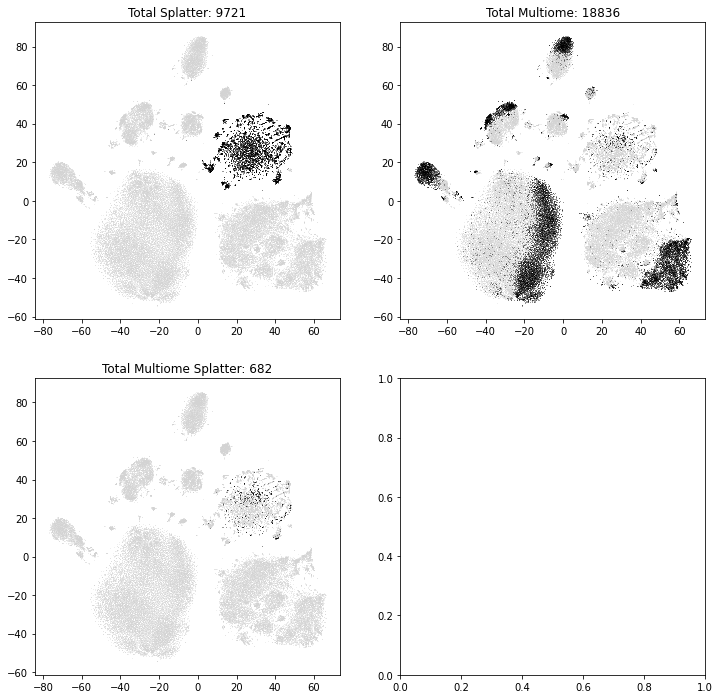

In [8]:
import matplotlib.pyplot as plt

f = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/no_harmony/PnEN_Clean.loom'
splatter = [9,10,11,12,13]

with loompy.connect(f) as ds:
    print(ds.ca.keys())
    print(np.unique(ds.ca.shortname))
    XY = ds.ca.TSNE
    x = np.isin(ds.ca.Clusters, splatter)
    y = np.isin(ds.ca.Chemistry, ['0'])
    ms = x & y
    print(np.sum(y))
    print(np.sum(ms))
    fig, ax = plt.subplots(2,2, figsize=(12,12))
    ax = ax.flatten()
    ax[0].scatter(XY[:,0], XY[:,1], s=1, lw=0, marker='.', c='lightgray')
    ax[0].scatter(XY[x,0], XY[x,1], s=1, lw=0, marker='.', c='black')
    ax[0].set_title(f'Total Splatter: {np.sum(x)}')

    ax[1].scatter(XY[:,0], XY[:,1], s=1, lw=0, marker='.', c='lightgray')
    ax[1].scatter(XY[y,0], XY[y,1], s=1, lw=0, marker='.', c='black')
    ax[1].set_title(f'Total Multiome: {np.sum(y)}')

    ax[2].scatter(XY[:,0], XY[:,1], s=1, lw=0, marker='.', c='lightgray')
    ax[2].scatter(XY[ms,0], XY[ms,1], s=1, lw=0, marker='.', c='black')
    ax[2].set_title(f'Total Multiome Splatter: {np.sum(ms)}')

Counter({16: 4385, 21: 4273, 22: 3813, 1: 1791, 6: 1407, 7: 1229, 11: 609, 15: 343, 20: 178, 14: 176, 18: 100, 17: 97, 19: 68, 8: 65, 4: 64, 2: 63, 3: 53, 0: 49, 9: 40, 12: 27, 13: 5, 10: 1})
(59480, 18830)


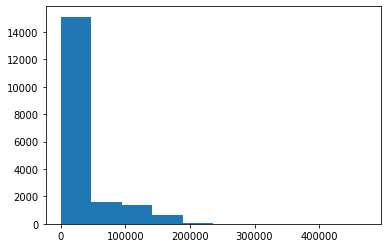

In [9]:
from collections import Counter
import glob
import pandas as pd

f = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/no_harmony/PnEN_Clean.loom'
f_1 = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom'
f_out = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom'
sample_dir = '/data/proj/AllenInst'

with loompy.connect(f) as ds:
    cnt = Counter(ds.ca.Clusters[y])
    print(cnt)
    valid_clusters = [k for k,v in cnt.items() if v> 10]
    valid = np.array(y & np.isin(ds.ca.Clusters, valid_clusters))
    
loompy.combine_faster([f], f_1, selections=[valid])

with loompy.connect(f_1) as ds:
    print(ds.shape)
    ds.ca.SampleID = np.array([x.replace('.','_') for x in ds.ca.SampleID])
    ds.ca.CellID = np.array([x + '-1' for x in ds.ca.CellID])
    ds.ca.Clusters_main = ds.ca.Clusters
    ds.ca.TSNE_RNA = ds.ca.TSNE
    
    cls = sorted(np.unique(ds.ca.Clusters))
    rn = {k:v for k,v in zip(cls,np.arange(len(cls)))}
    ds.ca.Clusters = np.array([rn[x] for x in ds.ca.Clusters])
    
    ds.ca.passed_filters = np.zeros(ds.shape[1]).astype(int)
    for i in np.unique(ds.ca.SampleID):
        x = np.where(ds.ca.SampleID==i)[0]
        fb = glob.glob(f'{sample_dir}/{i}*/outs/per_barcode_metrics.csv')[0]
        barcodes = pd.read_csv(fb)
        bars = [x.split(':')[-1] for x in ds.ca.CellID[x]]
        
        select = [np.where(barcodes['barcode'] == x)[0][0] for x in bars]
        vals = barcodes['atac_fragments'][select]
        ds.ca.passed_filters[x] = vals
    plt.figure()
    plt.hist(ds.ca.passed_filters)

In [53]:
from collections import Counter
import os
f = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom'
sample_dir = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/samples_RNA/'

with loompy.connect(f) as ds:
    samples = np.unique(ds.ca.SampleID)

for s in samples:
    print(s)
    f_out = os.path.join(sample_dir, f'{s}.loom')
    with loompy.connect(f) as ds:
        valid = np.array(ds.ca.SampleID == s)             
    loompy.combine_faster([f], f_out, selections=[valid])

Allen_H19_30_001
Allen_H19_30_002


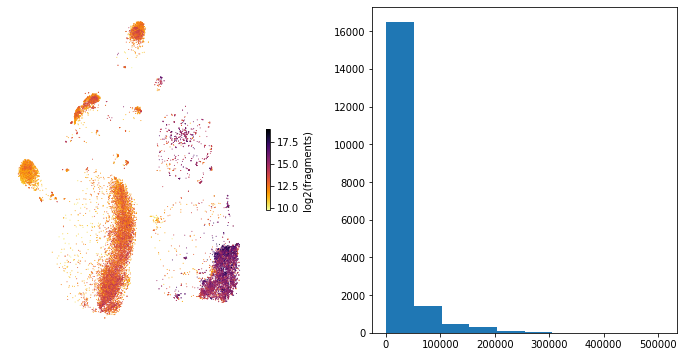

In [205]:
f_out = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom'

with loompy.connect(f_out) as ds:

    if 'Total' not in ds.ca:
        ds.ca.Total = ds.map([np.sum], axis=1)[0]
    XY = ds.ca.TSNE

    plt.figure(figsize=(12,6))
    plt.subplot(121)
    im1 = scattern(XY, c=np.log2(ds.ca.Total+1), s=1)
    plt.axis('off')
    plt.colorbar(im1, orientation='vertical', shrink=.25, label='log2(fragments)');
    
    plt.subplot(122)
    plt.hist(ds.ca.Total)

In [184]:
from collections import Counter
import os
f = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks_old.loom'
f_out = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks.loom'

with loompy.connect(f) as ds:
    if not 'FRtss' in ds.ca:
        tss = np.where(abs(ds.ra['Distance to TSS'].astype(int))<200)[0]
        X = ds[:,:][tss,:] > 0
        X = np.sum(X,axis=0)
        ds.ca.FRtss = np.array(X / ds.ca.passed_filters)
    valid = (ds.ca.passed_filters > 2000) & (ds.ca.FRtss>.25)
         
loompy.combine_faster([f], f_out, selections=[valid])

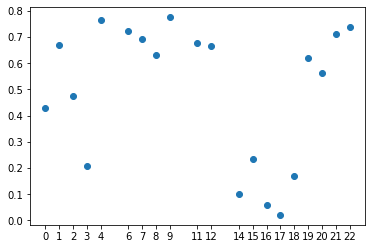

In [206]:
f = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks_old.loom'

with loompy.connect(f) as ds:
    
    cnt = Counter(ds.ca['Clusters_main'])
    cnt2 = Counter(ds.ca['Clusters_main'][valid])
    
l = []
k = np.array(sorted(cnt.keys()))
for i in k:
    l.append(cnt2[i]/cnt[i])
    
plt.scatter(k, l);
plt.xticks(ticks = k, labels = k.astype(str));

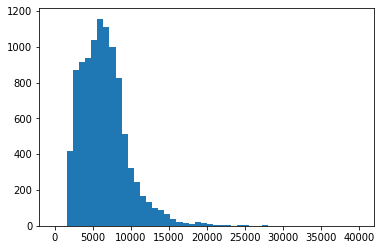

In [208]:
f = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks.loom'

with loompy.connect(f) as ds:
#     ds.ca.passed_filters = ds.map([np.sum], axis=1)[0]
    plt.hist(ds.ca.passed_filters, bins=50, range=(0,40000))

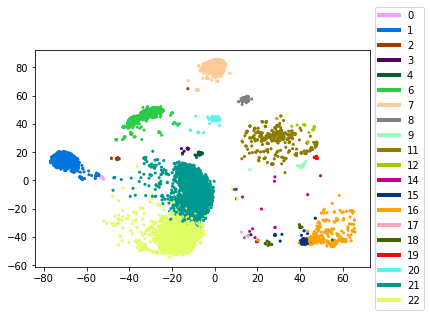

In [285]:
f1 = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering_RNN/All/All_peaks.loom'
fR = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom'
with loompy.connect(f1) as ds:
    with loompy.connect(fR) as dsr:
#         scatterc(dsr.ca.TSNE, c=dsr.ca.Clusters)


        match = {k:v for v, k in enumerate(dsr.ca.CellID)}
    
        tsne = np.zeros((ds.shape[1],2)).astype(np.float64)
        
        for i, x in enumerate(ds.ca.CellID):
            k = match[x]
            tsne[i] = dsr.ca['TSNE'][k]
            
        ds.ca.TSNE_RNA = tsne
            
        scatterc(ds.ca.TSNE_RNA, c=ds.ca.Clusters_main)

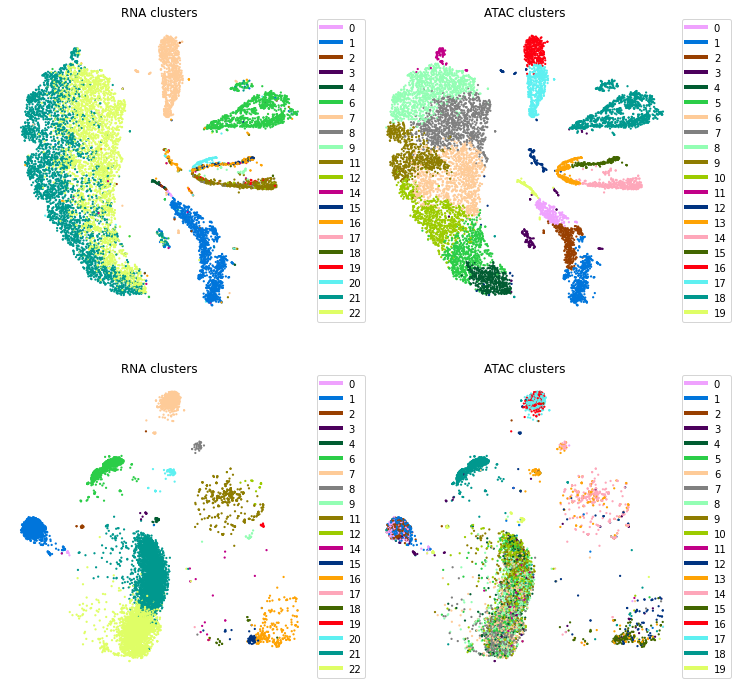

In [286]:
s = 5

with loompy.connect(f1) as ds:
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    scatterc(ds.ca.TSNE, c=ds.ca.Clusters_main, s=s)
    plt.title('RNA clusters')
    plt.axis('off')
    
    plt.subplot(222)
    scatterc(ds.ca.TSNE, c=ds.ca.Clusters, s=s)
    plt.title('ATAC clusters')
    plt.axis('off')
    
    plt.subplot(223)
    scatterc(ds.ca.TSNE_RNA, c=ds.ca.Clusters_main, s=s)
    plt.title('RNA clusters')
    plt.axis('off')
    
    plt.subplot(224)
    scatterc(ds.ca.TSNE_RNA, c=ds.ca.Clusters, s=s)
    plt.title('ATAC clusters')
    plt.axis('off')

In [232]:
from scipy.spatial.distance import jaccard

with loompy.connect(f1) as ds:
    nA = len(np.unique(ds.ca.Clusters))
    nR = len(np.unique(ds.ca.Clusters_main))
    mat = np.zeros((nA,nR))
    
    for i in range(nA): 
        for j in range(nR):
            x = ds.ca.Clusters == i
            y = ds.ca.Clusters_main == j
            mat[i,j] = jaccard(x,y)

In [221]:
?jaccard

Signature: jaccard(u, v, w=None)
Docstring:
Compute the Jaccard-Needham dissimilarity between two boolean 1-D arrays.

The Jaccard-Needham dissimilarity between 1-D boolean arrays `u` and `v`,
is defined as

.. math::

   \frac{c_{TF} + c_{FT}}
        {c_{TT} + c_{FT} + c_{TF}}

where :math:`c_{ij}` is the number of occurrences of
:math:`\mathtt{u[k]} = i` and :math:`\mathtt{v[k]} = j` for
:math:`k < n`.

Parameters
----------
u : (N,) array_like, bool
    Input array.
v : (N,) array_like, bool
    Input array.
w : (N,) array_like, optional
    The weights for each value in `u` and `v`. Default is None,
    which gives each value a weight of 1.0

Returns
-------
jaccard : double
    The Jaccard distance between vectors `u` and `v`.

Notes
-----
When both `u` and `v` lead to a `0/0` division i.e. there is no overlap
between the items in the vectors the returned distance is 0. See the
Wikipedia page on the Jaccard index [1]_, and this paper [2]_.

.. versionchanged:: 1.2.0
    Previousl

['Accession', 'Biotype', 'Chromosome', 'End', 'Expels', 'Gene', 'Selected', 'Start', 'Valid']


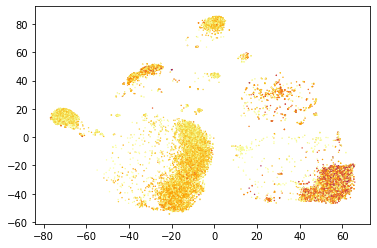

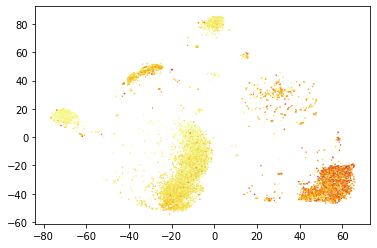

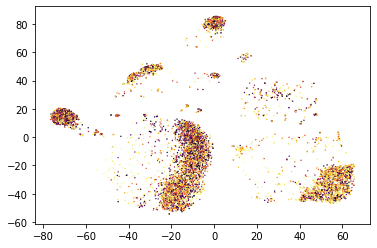

In [153]:
f = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All.loom'

with loompy.connect(f) as ds:
    print(ds.ra.keys())
    XY = ds.ca.TSNE

with loompy.connect('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks_old.loom') as ds:
    x = ds.ca.passed_filters
scattern(XY, c=x, s=2)

plt.figure()
scattern(XY[x>5000], c=x[x>5000], s=2)

plt.figure()
scattern(XY[x<5000], c=x[x<5000], s=2)

In [170]:
with loompy.connect('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks_old.loom') as ds:
    print(ds.ra.keys())
    
    tss = np.where(abs(ds.ra['Distance to TSS'].astype(int))<200)[0]
    X = ds[:,:][tss,:] > 0
    X = np.sum(X,axis=0)
    FRtss = X / ds.ca.passed_filters

['Annotation', 'Chr', 'CpG%', 'Detailed Annotation', 'Distance to TSS', 'End', 'Entrez ID', 'Focus Ratio-Region Size', 'GC%', 'Gene Alias', 'Gene Description', 'Gene Name', 'Gene Type', 'ID', 'NCells', 'Nearest Ensembl', 'Nearest PromoterID', 'Nearest Refseq', 'Nearest Unigene', 'Peak Score', 'Start', 'Strand', 'Valid', 'preCluster_residuals', 'precluster_mu', 'precluster_sd']


/home/camiel/anaconda3/envs/chromo/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


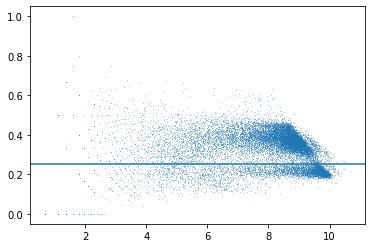

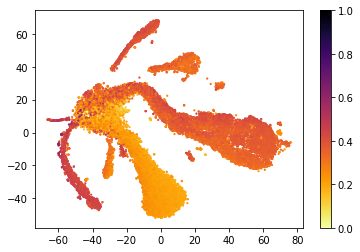

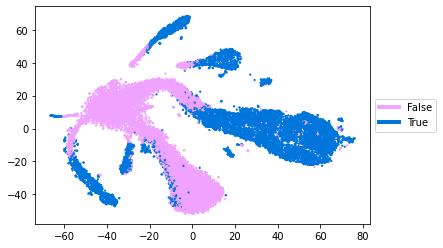

In [182]:
t = .25

with loompy.connect('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks_old.loom') as ds:
    plt.scatter(np.log(ds.ca.passed_filters+1), FRtss, s=1, lw=0, marker='.')
    plt.axhline(t)
    
    plt.figure()
    scattern(ds.ca.TSNE, c=FRtss)
    plt.colorbar()
    
    plt.figure()
    x = (ds.ca.passed_filters > 2000) & (FRtss>t)
    
    scatterc(ds.ca.TSNE, c=x)

In [126]:
with loompy.connect('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks_old.loom') as ds:
    print(ds.ca.keys())
    
    print(ds.ca.CellID)
    print(ds.ca.Name)

['Age', 'Agetext', 'Ageunit', 'All_fc_analysis_id', 'Analysis', 'BarcodeTotalUMIs', 'CellCycle', 'CellCycle_G1', 'CellCycle_G2M', 'CellCycle_S', 'CellID', 'CellID_old', 'Cellconc', 'Chemistry', 'Clusters', 'ClustersCollected', 'ClustersModularity', 'ClustersSurprise', 'Clusters_RNA', 'Clusters_main', 'Clusters_polished', 'Cmobarcodes', 'Comment', 'CreationDate', 'Datecaptured', 'Donor', 'DoubletFinderFlag', 'DoubletFinderScore', 'Editat', 'Editby', 'FRIP', 'Id', 'IsCycling', 'LSI', 'Label', 'MT_ratio', 'MeanTotalUMI', 'Method', 'NGenes', 'NPeaks', 'Name', 'Neuronprop', 'Numpooledanimals', 'Outliers', 'OutliersModularity', 'OutliersSurprise', 'Outliers_polished', 'PCA', 'Plugdate', 'Project', 'PseudoAge', 'Roi', 'SampleID', 'Sampleok', 'Sex', 'Shortname', 'Species', 'Strain', 'Subset', 'TSNE', 'Targetnumcells', 'Tissue', 'Total', 'TotalUMI', 'Transcriptome', 'UMAP', 'UMAP3D', 'Valid_ambiguous', 'Valid_spliced', 'Valid_unspliced', 'age', 'agetext', 'ageunit', 'all_fc_analysis_id', 'analy

In [128]:
files = glob.glob('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/*/*.loom')

for f in files:
    with loompy.connect(f) as ds:
        if 'CellID' in ds.ca:
            ds.ca.Name = np.array([x.split(':')[0] for x in ds.ca.CellID])

In [132]:
with loompy.connect('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks.loom') as ds:
    print(ds.ca.CellID[0].split('-'))

['Allen_H19_30_002:TCTACTAGTTACCGGG', '1']


In [123]:
# files = glob.glob('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/*/*.loom')

# for f in files:
#     with loompy.connect(f) as ds:
#         ds.ca.Chemistry = np.repeat('multiome_atac', ds.shape[1])

In [47]:
import logging
import warnings

import community
import networkx as nx
import numpy as np
import scipy.sparse as sparse
from umap import UMAP
from sklearn.manifold import TSNE
from numba import NumbaPerformanceWarning, NumbaPendingDeprecationWarning
from scipy.sparse import SparseEfficiencyWarning
from pynndescent import NNDescent
from sknetwork.clustering import Louvain

import loompy
from cytograph.annotation import CellCycleAnnotator
from cytograph.decomposition import HPF, PCA
from cytograph.embedding import art_of_tsne
from cytograph.enrichment import FeatureSelectionByEnrichment, FeatureSelectionByVariance
from cytograph.manifold import BalancedKNN
from cytograph.metrics import jensen_shannon_distance
from cytograph.manifold import PoissonPooling
from cytograph.preprocessing import Normalizer
from cytograph.species import Species

from cytograph.pipeline.config import load_config

config = load_config()
main_layer = ""

f_out = ['/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom', '/proj/DEV_ATAC/Kim_PnEN/PnEN_Splatter/All/All_RNA.loom']
for i in f_out:
    with loompy.connect(i) as ds:

        ds.ca.CellID_old = ds.ca.CellID
        ds.ca.CellID = np.array([f"{a}:{b.split(':')[1]}" for a,b in zip(ds.ca.SampleID, ds.ca.CellID)])
        
        species = Species.detect(ds)
        logging.info(f"Species is '{species.name}'")

        logging.info("Recomputing the list of valid genes")
        nnz = ds.map([np.count_nonzero], axis=0)[0]
        valid_genes = (nnz > 10) & (nnz < ds.shape[1] * 0.6)
        ds.ra.Valid = valid_genes.astype('int')

        logging.info(f"Feature selection by enrichment on preliminary clusters")
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=NumbaPerformanceWarning)  # Suppress warnings about numba not being able to parallelize code
            warnings.simplefilter("ignore", category=NumbaPendingDeprecationWarning)  # Suppress warnings about future deprecations
            warnings.simplefilter("ignore", category=SparseEfficiencyWarning)  # Suppress warnings about setting the diagonal to 1
            logging.info(f"  Gene selection for PCA")
            genes = FeatureSelectionByVariance(config.params.n_genes, mask=Species.mask(ds, config.params.mask)).fit(ds)
            logging.info(f"  Factorization by PCA")
            normalizer = Normalizer(False)
            normalizer.fit(ds)
            logging.info("  PCA projection to %d components", config.params.n_factors)
            pca = PCA(genes, max_n_components=config.params.n_factors, layer=main_layer, test_significance=False, batch_keys=config.params.batch_keys)
            transformed = pca.fit_transform(ds, normalizer)
            logging.info(f"  Computing KNN (k={config.params.k}) in PCA space")
            nn = NNDescent(data=transformed, metric="euclidean")
            indices, distances = nn.query(transformed, k=config.params.k)
            indices = indices[:, 1:]
            distances = distances[:, 1:]
            knn = sparse.csr_matrix(
                (np.ravel(distances), np.ravel(indices), np.arange(0, distances.shape[0] * distances.shape[1] + 1, distances.shape[1])), (transformed.shape[0], transformed.shape[0])
            )

        n_labels = ds.ca.Clusters.max() + 1
        genes = FeatureSelectionByEnrichment(int(config.params.n_genes // n_labels), Species.mask(ds, config.params.mask), findq=False).select(ds)

        logging.info(f"Factorization by PCA")
        normalizer = Normalizer(False)
        normalizer.fit(ds)
        n_components = min(config.params.n_factors, ds.shape[1])
        logging.info("  PCA projection to %d components", n_components)
        pca = PCA(genes, max_n_components=n_components, layer=main_layer, test_significance=False, batch_keys=config.params.batch_keys)
        ds.ca.PCA = pca.fit_transform(ds, normalizer)

        if config.params.nn_space in ["PCA", "auto"] and "PCA" in ds.ca:
            transformed = ds.ca.PCA
            metric = "euclidean"
        elif config.params.nn_space in ["HPF", "auto"] and "HPF" in ds.ca:
            transformed = ds.ca.HPF
            metric = "js"
        logging.info(f"Computing balanced KNN (k = {config.params.k}) in {config.params.nn_space} space using the '{metric}' metric")
        bnn = BalancedKNN(k=config.params.k, metric=metric, maxl=2 * config.params.k, sight_k=2 * config.params.k, n_jobs=-1)
        bnn.fit(transformed)
        knn = bnn.kneighbors_graph(mode='distance')
        knn.eliminate_zeros()
        mknn = knn.minimum(knn.transpose())
        # Convert distances to similarities
        max_d = knn.data.max()
        knn.data = (max_d - knn.data) / max_d
        mknn.data = (max_d - mknn.data) / max_d
        ds.col_graphs.KNN = knn
        ds.col_graphs.MKNN = mknn
        mknn = mknn.tocoo()
        mknn.setdiag(0)
        # Compute the effective resolution
        d = 1 - knn.data
        radius = np.percentile(d, 90)
        logging.info(f"  90th percentile radius: {radius:.02}")
        ds.attrs.radius = radius
        inside = mknn.data > 1 - radius
        rnn = sparse.coo_matrix((mknn.data[inside], (mknn.row[inside], mknn.col[inside])), shape=mknn.shape)
        ds.col_graphs.RNN = rnn

In [26]:
f_out = ['/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom', '/proj/DEV_ATAC/Kim_PnEN/PnEN_Splatter/All/All_RNA.loom']

for f in f_out:
    with loompy.connect(f) as ds:
#         ds.ca.CellID_old = ds.ca.CellID
        
        ds.ca.CellID = np.array([f"{a}:{b.split(':')[1]}" for a,b in zip(ds.ca.SampleID, ds.ca.CellID)])

In [35]:
missing = []
f_out = ['/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom', '/proj/DEV_ATAC/Kim_PnEN/PnEN_Splatter/All/All_RNA.loom']

for f in f_out:
    with loompy.connect(f) as ds:
        for i in ds.ca.CellID:
            s, bar = i.split(':')
            file = os.path.join(f'/proj/DEV_ATAC/Kim_PnEN/PnEN_All/samples/{s}/fragments/{bar}.tsv.gz')
            if not os.path.isfile(file):
                open(file, 'a').close()

17:39:48 INFO     Using KNN graph
17:39:48 INFO     Louvain community detection
17:40:27 INFO     Marking tiny clusters as outliers
17:40:27 INFO     Using MKNN graph
17:40:27 INFO     Louvain community detection
17:40:48 INFO     Marking tiny clusters as outliers
17:40:48 INFO     Using RNN graph
17:40:48 INFO     Louvain community detection
17:41:06 INFO     Marking tiny clusters as outliers


(-51.916268597500284, 64.51216501236655, -71.38547785476761, 67.77922970203433)

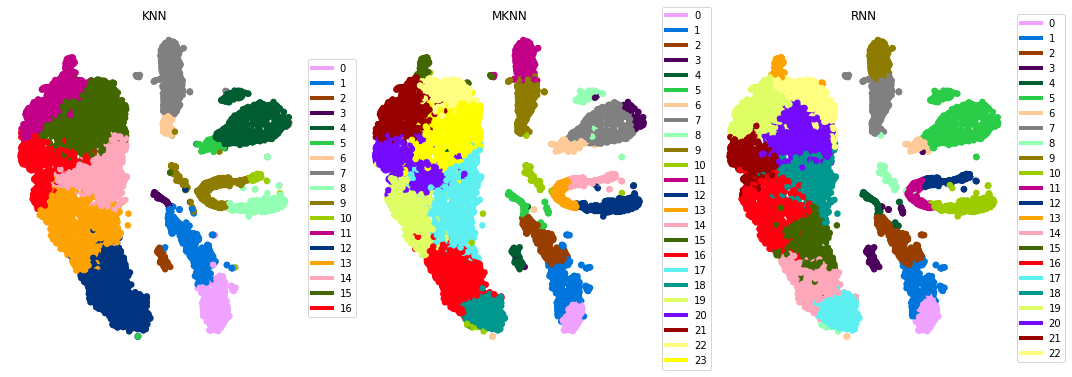

In [250]:
from cytograph.clustering import UnpolishedLouvain, PolishedLouvain

f = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks.loom'

with loompy.connect(f) as ds:
    
    pl = UnpolishedLouvain(graph='KNN', embedding='TSNE', min_cells=50)
    labels_KNN = pl.fit_predict(ds)
    
    pl = UnpolishedLouvain(graph='MKNN', embedding='TSNE', min_cells=50)
    labels_MKNN = pl.fit_predict(ds)
    
    pl = UnpolishedLouvain(graph='RNN', embedding='TSNE', min_cells=50)
    labels_RNN = pl.fit_predict(ds)
    
    XY = ds.ca.TSNE
    
plt.figure(figsize=(18,6));
plt.subplot(131);
scatterc(XY, c=labels_KNN);
plt.title('KNN');
plt.axis('off');

plt.subplot(132);
scatterc(XY, c=labels_MKNN);
plt.title('MKNN');
plt.axis('off');

plt.subplot(133);
scatterc(XY, c=labels_RNN);
plt.title('RNN');
plt.axis('off');

18:06:01 INFO     Using KNN graph
18:06:01 INFO     Louvain community detection
18:06:26 INFO     Using DBSCAN to mark outliers
18:06:28 INFO     Using neighborhood to mark outliers
18:06:29 INFO     Breaking clusters
18:06:32 INFO     Smoothing cluster identity on the embedding
18:06:34 INFO     Marking tiny clusters as outliers
18:06:34 INFO     Using MKNN graph
18:06:34 INFO     Louvain community detection
18:06:48 INFO     Using DBSCAN to mark outliers
18:06:49 INFO     Using neighborhood to mark outliers
18:06:50 INFO     Breaking clusters
18:06:53 INFO     Smoothing cluster identity on the embedding
18:06:55 INFO     Marking tiny clusters as outliers
18:06:55 INFO     Using RNN graph
18:06:55 INFO     Louvain community detection
18:07:09 INFO     Using DBSCAN to mark outliers
18:07:10 INFO     Using neighborhood to mark outliers
18:07:11 INFO     Breaking clusters
18:07:14 INFO     Smoothing cluster identity on the embedding
18:07:16 INFO     Marking tiny clusters as outliers


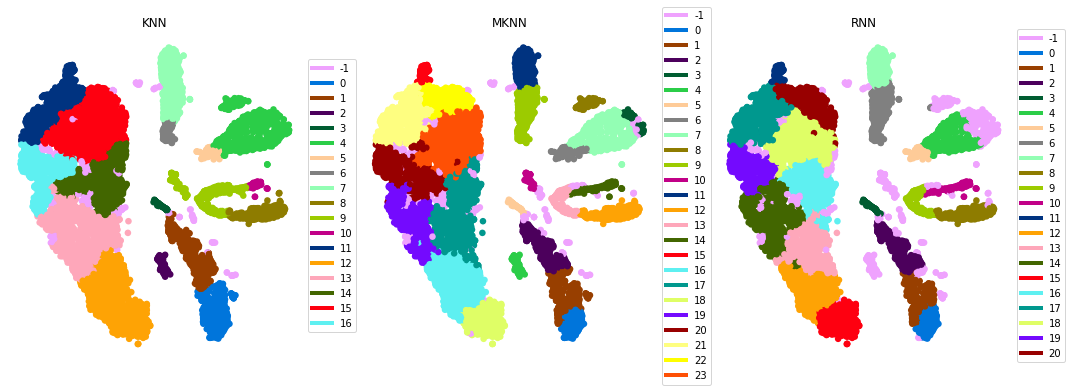

In [251]:
from cytograph.clustering import UnpolishedLouvain, PolishedLouvain

f = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks.loom'

with loompy.connect(f) as ds:
    
    pl = PolishedLouvain(graph='KNN', embedding='TSNE', min_cells=50)
    labels_KNN = pl.fit_predict(ds)
    
    pl = PolishedLouvain(graph='MKNN', embedding='TSNE', min_cells=50)
    labels_MKNN = pl.fit_predict(ds)
    
    pl = PolishedLouvain(graph='RNN', embedding='TSNE', min_cells=50)
    labels_RNN = pl.fit_predict(ds)
    
    XY = ds.ca.TSNE
    
plt.figure(figsize=(18,6));
plt.subplot(131);
scatterc(XY, c=labels_KNN);
plt.title('KNN');
plt.axis('off');

plt.subplot(132);
scatterc(XY, c=labels_MKNN);
plt.title('MKNN');
plt.axis('off');

plt.subplot(133);
scatterc(XY, c=labels_RNN);
plt.title('RNN');
plt.axis('off');

In [ ]:
# Description etc to be added

import numpy as np
import os
import sys
import pybedtools
from pybedtools import BedTool
import collections
import csv
import pandas as pd
import matplotlib.pyplot as plt
import loompy
import scipy.sparse as sparse
import json
import logging
import pickle
import glob
import gc
import multiprocessing as mp

from chromograph.pipeline import config
from chromograph.preprocessing.utils import *
from chromograph.features.feature_count import *
from chromograph.preprocessing.doublet_finder import doublet_finder
from chromograph.RNA.utils import rna_barcodes_to_atac

# logger = logging.getLogger()
# logging.basicConfig(
#     format='%(asctime)s %(levelname)-8s %(message)s',
#     level=logging.INFO,
#     datefmt='%H:%M:%S')

class Chromgen:
    def __init__(self) -> None:
        """
        Generate a binned loom file from scATAC-seq data
        
        Args:
            steps                    Which steps to include in the analysis

        Remarks:
            # All parameters are obtained from the config object, which comes from the default config
            # and can be overridden by the config in the current punchcard
        """
        self.config = config.load_config()
        self.rnaXatac = False
        self.RNA_file = ''
        pybedtools.helpers.set_bedtools_path(self.config.paths.bedtools)
        logging.info("Chromgen initialised")

    def fit(self, valids, indir: str, bsize: int = 5000, outdir: str = None, genome_size: str = None, blacklist: str = None, min_fragments: bool = False) -> None:
        ''''
        Create a .loom file from 10X Genomics cellranger output with reads binned
        Args:
            indir (str):	path to the cellranger output folder (the one that contains 'outs')
            bsize (int):	size of the bins (defaults to 5000/5kb)
            outdir (str):	output folder wher the new loom file should be saved (default to indir)
            genome_size (str):	path to file containing chromosome sizes, usually derived from encode (i.e. 'hg19.chrom.sizes.tsv')
            blacklist (str):	path to bedfile containing blacklisted region (i.e. 'blacklist_hg19.bed')
        Returns:
            path (str):		Full path to the created loom file.
        Remarks:
            The resulting file will be named ``{sampleID}.loom``, where the sampleID is the one given by cellranger.
        '''
        logging.info(f"Binning reads from {indir.split('/')[-1]} into {bsize/1000} kb bins")
        logging.info(f"Reading from {indir}")
        logging.info(f"Saving to {outdir}")
        logging.info(f"Available CPUs: {mp.cpu_count()}")

        sample = indir.split('/')[-1]
        if len(sample.split('_')) > 2:
            sample = '_'.join(sample.split('_')[:2])

        ## Check if rnaXatac
        self.rnaXatac = True
        self.RNA_file = os.path.join(self.config.paths.RNA, f'{sample}.loom')
        if self.rnaXatac:
            logging.info(f'Multiome sample')
            fb = glob.glob(f'{indir}*/outs/per_barcode_metrics.csv')[0]
            ff = glob.glob(f'{indir}*/outs/atac_fragments.tsv.gz')[0]
            fs = glob.glob(f'{indir}*/outs/summary.csv')[0]
        else:
            logging.info('scATAC-seq sample')
            fb = indir + '/outs/singlecell.csv'
            ff = indir + '/outs/fragments.tsv.gz'
            fs = indir + '/outs/summary.json'

        if not os.path.isdir(outdir):
            os.mkdir(outdir)
   
        logging.info(f'Reading metadata and summary for {sample} from Cellranger output {fs}')
        if self.rnaXatac:
            summary = np.genfromtxt(fs, dtype=str, delimiter=',')
            summary = {str(k): str(v) for k, v in zip(summary[0,:], summary[1,:])}
            summary['reference_assembly'] = summary['Genome']

            if summary['reference_assembly'] == "hg38-final3":
                summary['reference_assembly'] = 'GRCh38'
        else:
            with open(fs, "r") as f:
                summary = json.load(f)

                for k,v in summary.items():
                    summary[k] = str(v)
            if summary['reference_genomes'] in ["['GRCh38']", "hg38-final3"]:
                summary['reference_assembly'] = 'GRCh38'
        summary['bin_size'] = bsize
        summary['level'] = self.config.params.level
        barcodes = pd.read_csv(fb)
                
        if self.rnaXatac:    
            barcodes = barcodes.rename(columns = {'barcode': 'barcode',
                                                    'is_cell': 'is__cell_barcode',
                                                    'atac_raw_reads': 'total',
                                                    'atac_unmapped_reads': 'unmapped',
                                                    'atac_lowmapq': 'lowmapq',
                                                    'atac_dup_reads': 'duplicate',
                                                    'atac_chimeric_reads': 'chimeric',
                                                    'atac_mitochondrial_reads': 'mitochondrial',
                                                    'atac_fragments': 'passed_filters',
                                                    'atac_TSS_fragments': 'TSS_fragments',
                                                    'atac_peak_region_fragments': 'peak_region_fragments',
                                                    'atac_peak_region_cutsites': 'peak_region_cutsites'}, 
                                    inplace = False)
        ## Transfer metadata to dict format
        meta = {}
#         bars = [x.split('-')[0] for x in barcodes['barcode']]
        bars = barcodes['barcode']
        passed = np.isin(bars, valids)
        for key in barcodes:
            meta[key] = np.array(barcodes[key][passed])
        
        meta['CellID'] = np.array([f'{sample}:{x}' for x in meta['barcode']])
        
        ## Remove trailing -1 if present
        if len(meta['CellID'][0].split('-')) > 1:
            meta['CellID'] = np.array([x.split('-')[0] for x in meta['CellID']])
    
        logging.info(f"Total of {len(meta['barcode'])} valid cells")
        logging.info(f"Ref. assembly {summary['reference_assembly']}")

        # Get Chromosome sizes
        if genome_size == None:
            chrom_size = get_chrom_sizes(summary['reference_assembly'])    
        else:
            chrom_size = {}
            with open(genome_size) as f:
                for line in f:
                    x = line.split()
                    chrom_size[x[0]] = int(x[1])

        ## Split fragments by cell
        split_fragments2(ff, outdir, meta, chrom_size)
        
sample_dir = '/data/proj/AllenInst/'
f_out = '/proj/DEV_ATAC/Kim_PnEN/PnEN_All/All/All_RNA.loom'

with loompy.connect(f_out) as ds:
    for s in np.unique(ds.ca.SampleID):
        valids = np.array([x.split(':')[-1].strip('x') for x in ds.ca.CellID[np.where(ds.ca.SampleID==s)[0]]])
        outdir = f'/proj/DEV_ATAC/Kim_PnEN/PnEN_All/samples/{s}'
        cg = Chromgen()
        barcodes = cg.fit(valids, indir=os.path.join(sample_dir, s), outdir=outdir)

## Analysis

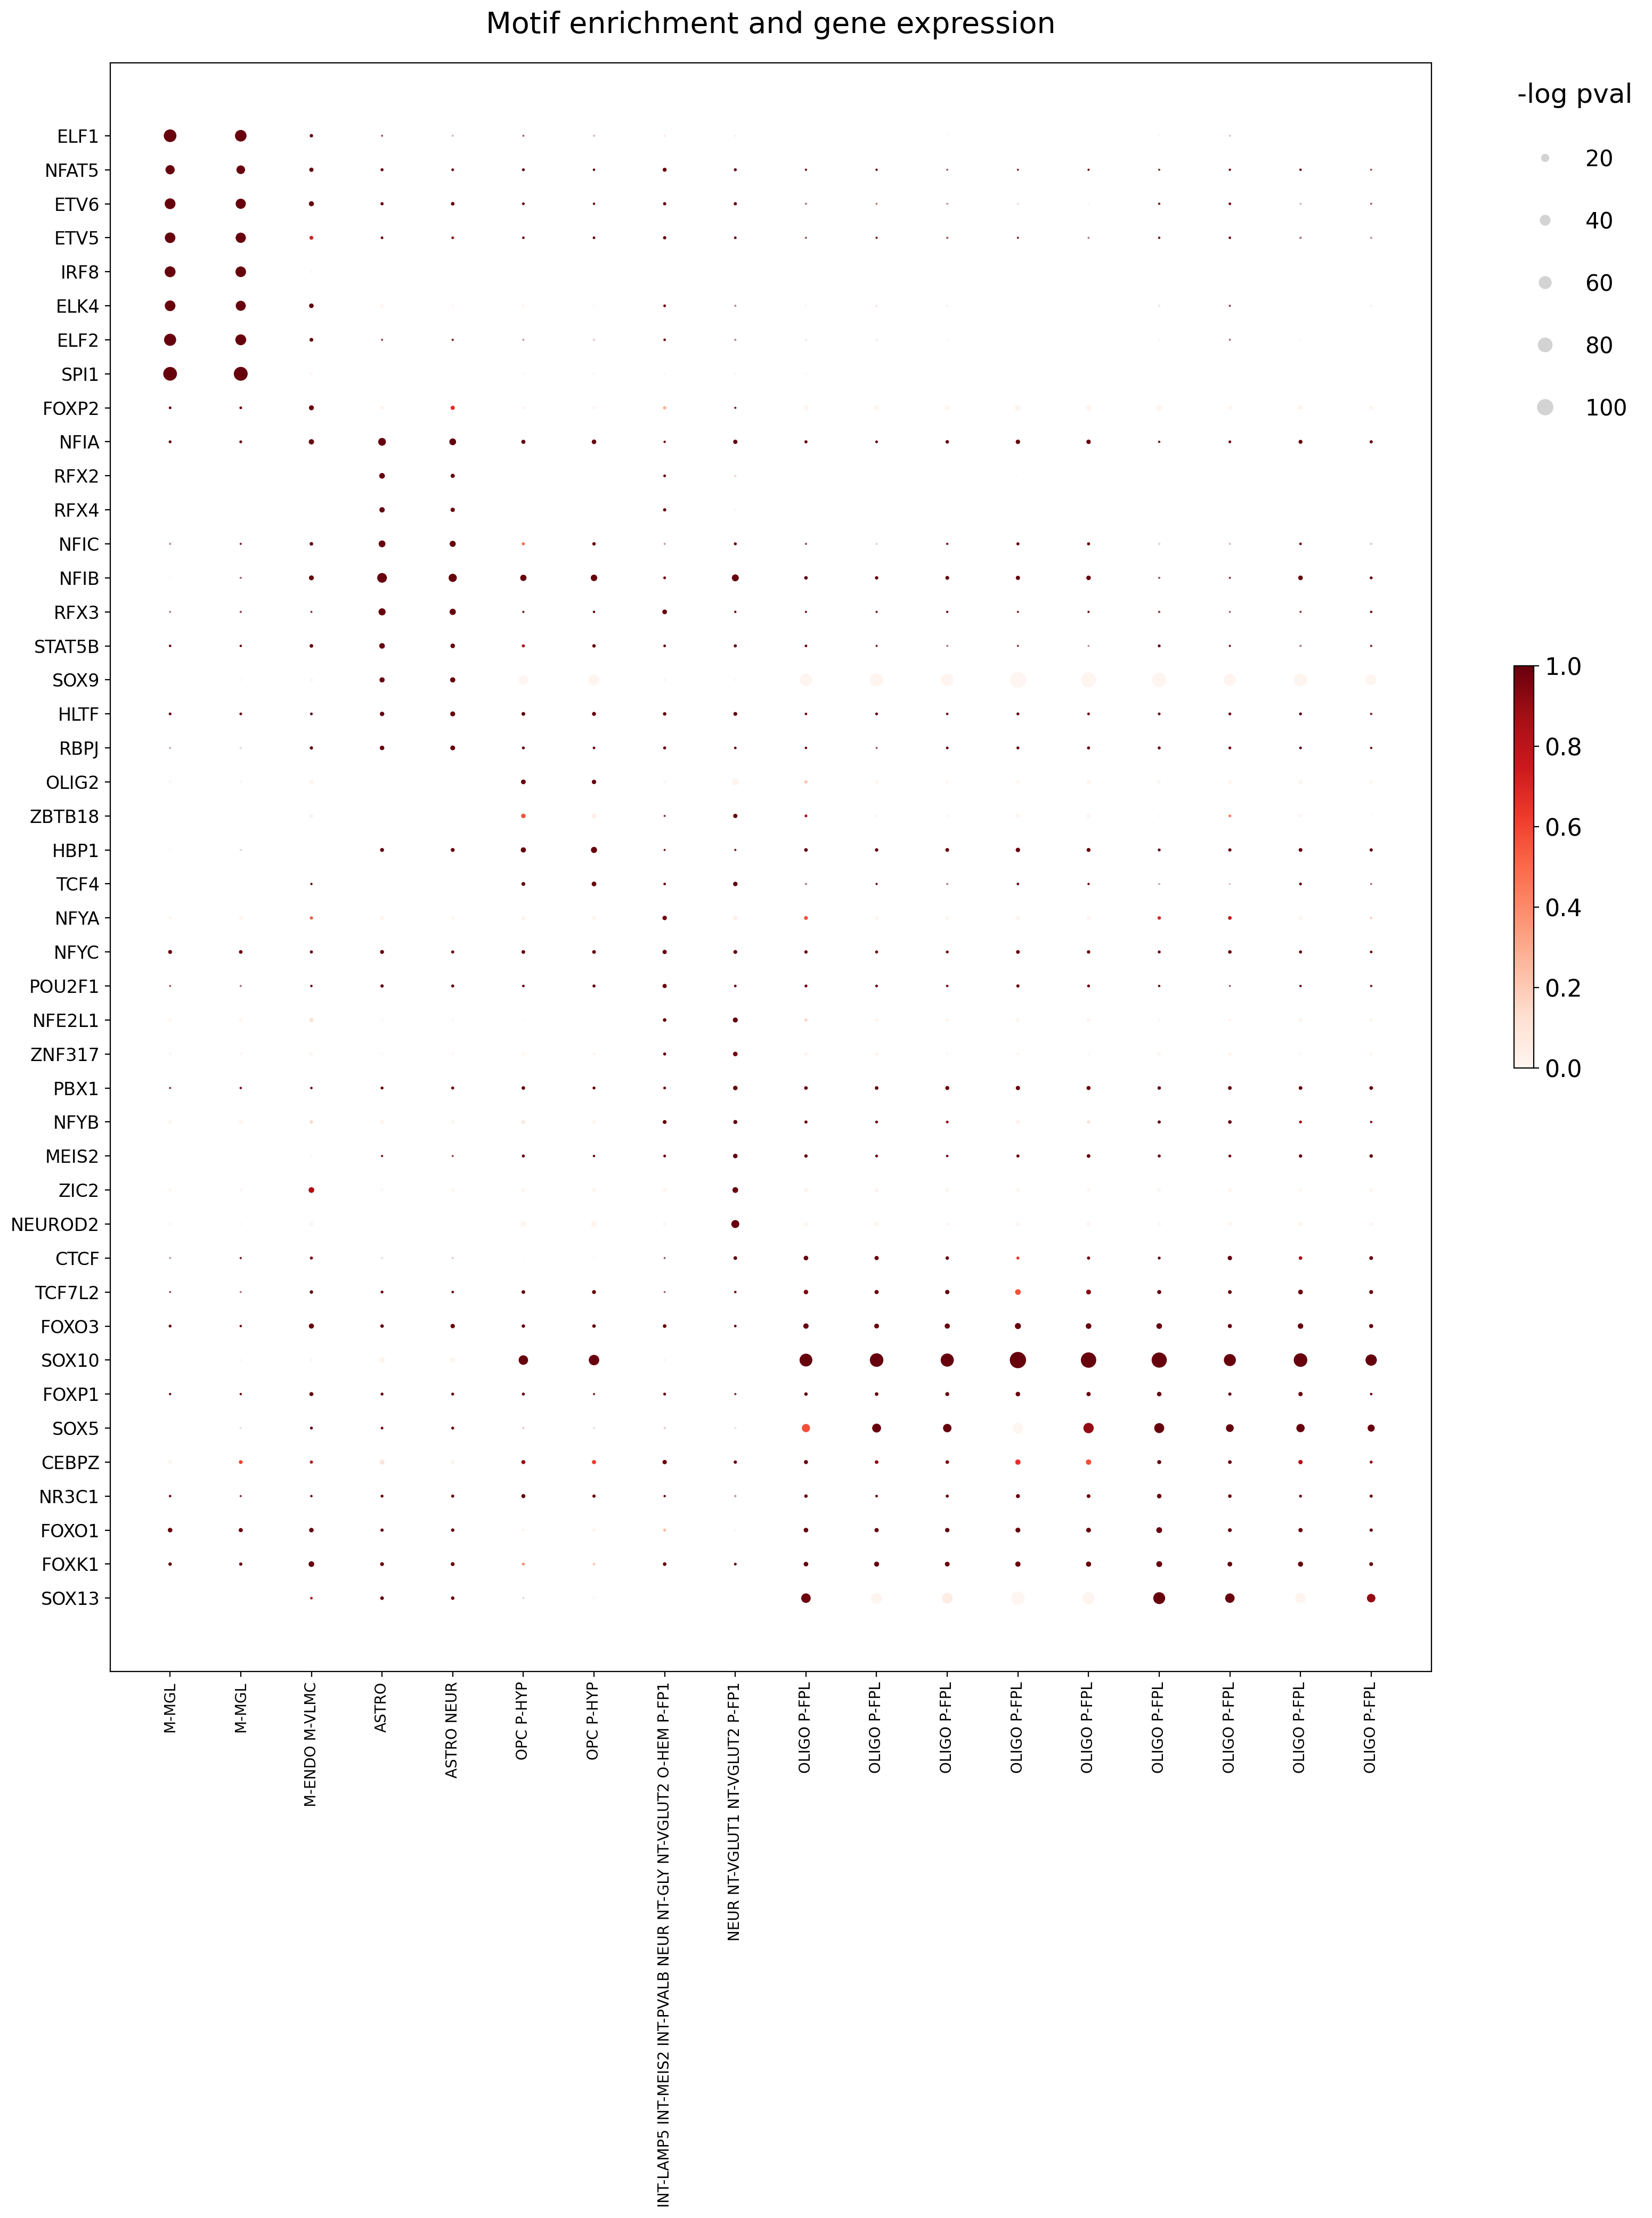

In [247]:
import loompy
from chromograph.plotting.motif_plot import motif_plot

f1 = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_motifs.agg.loom'
f2 = '/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_RNA.agg.loom'
n = 7

with loompy.connect(f1) as ds:
    with loompy.connect(f2) as dsr:
        motif_plot(ds,dsr,out_file=f'/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/exported/motifs_{n}.png', N=n)

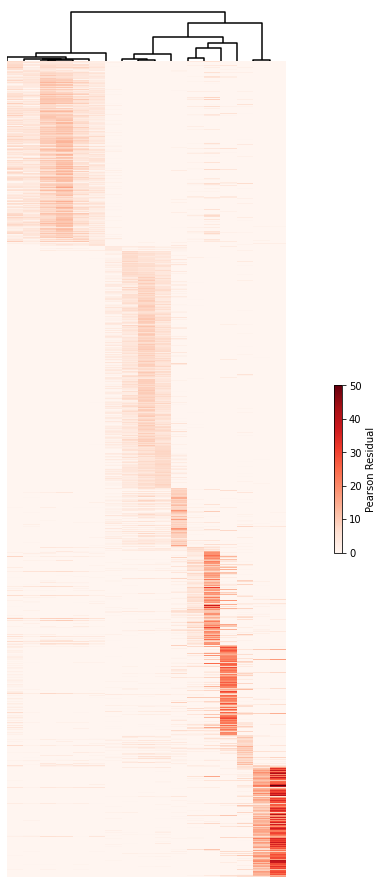

In [142]:
## Relative

import loompy
import matplotlib.pyplot as plt
import numpy as np

from cytograph.plotting.dendrogram import dendrogram

h = 16
w = 6

with loompy.connect('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks.agg.loom') as ds:
    x = np.where(ds.ra.markerPeaks>0)[0]
    values = ds['residuals'][:,:][x,:]
    
    order = np.argmax(values, axis=1)
    order = np.argsort(order)
    values = values[order,:]
    
    link = ds.attrs.linkage

fig, ax = plt.subplots(2,2, figsize=(w,h), gridspec_kw={'width_ratios': [w-1, 1], 'height_ratios': [1,h-1]});
clustermiddles = np.arange(values.shape[1]) / values.shape[1]
lc = dendrogram(link, leaf_positions=clustermiddles)
ax[0,0].add_collection(lc);
ax[0,0].set_ylim(0, link[:, 2].max() * 1.1);
ax[0,0].axis('off');

v = values
im = ax[1,0].imshow(v, aspect='auto', interpolation='nearest', cmap='Reds', vmin = 0, vmax=50);
ax[1,0].axis('off');
cbar = fig.colorbar(im, ax=ax[1,1], orientation='vertical', shrink=.25, label='Pearson Residual');
ax[1,1].axis('off');
ax[0,1].axis('off');
plt.subplots_adjust(wspace=0, hspace=0)

# plt.savefig('/home/camiel/misc/fig3/fig3_cCRE_RES.png', dpi=300, bbox_inches='tight')

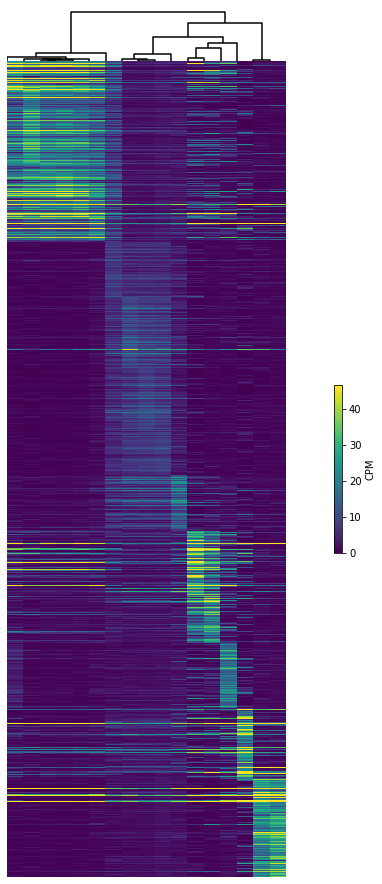

In [144]:
import loompy
import matplotlib.pyplot as plt
import numpy as np

from cytograph.plotting.dendrogram import dendrogram

with loompy.connect('/proj/DEV_ATAC/Kim_PnEN/ATAC_Clustering/All/All_peaks.agg.loom') as ds:
    x = np.where(ds.ra.markerPeaks>0)[0]
    values = ds['CPM'][:,:][x,:]
    
    order = np.argmax(values, axis=1)
    order = np.argsort(order)
    values = values[order,:]
    
    link = ds.attrs.linkage
    
h = 16
w = 6
fig, ax = plt.subplots(2,2, figsize=(w,h), gridspec_kw={'width_ratios': [w-1, 1], 'height_ratios': [1,h-1]});

clustermiddles = np.arange(values.shape[1]) / values.shape[1]
lc = dendrogram(link, leaf_positions=clustermiddles)
ax[0,0].add_collection(lc);
ax[0,0].set_ylim(0, link[:, 2].max() * 1.1);
ax[0,0].axis('off');

v = values
im = ax[1,0].imshow(v, vmax = np.quantile(v,.99), aspect='auto', interpolation='nearest');
ax[1,0].axis('off');
cbar = fig.colorbar(im, ax=ax[1,1], orientation='vertical', shrink=.25, label='CPM');
ax[1,1].axis('off');
ax[0,1].axis('off');
plt.subplots_adjust(wspace=0, hspace=0)

# plt.savefig('/home/camiel/misc/fig3/fig3_cCRE_CPM.png', dpi=300, bbox_inches='tight');